In [1]:
import cv2 as cv
import numpy as np
import sys
import math
from matplotlib import pyplot as plt

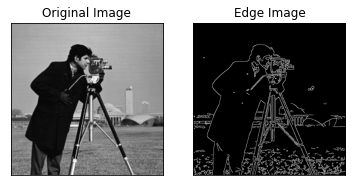

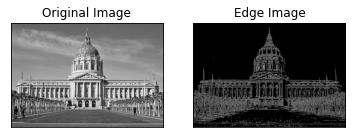

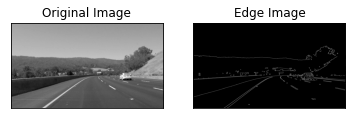

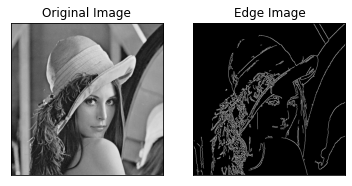

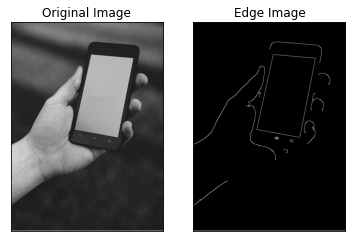

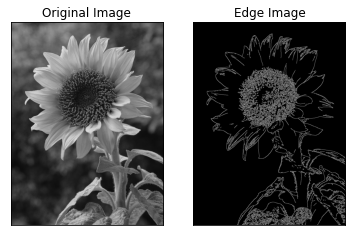

In [2]:
items = ['cameraman.jpg', 'city_hall.jpg', 'curved_lane.jpg', 'lena_color.jpg', 'phone.jpg', 'sunflower.jpg']

for item in items:
    img = cv.imread(item, 0)
    edges = cv.Canny(img,100,200)
    plt.subplot(121),plt.imshow(img,cmap = 'gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
items = ['cameraman.jpg', 'city_hall.jpg', 'curved_lane.jpg', 'lena_color.jpg', 'phone.jpg', 'sunflower.jpg']

for item in items:
    img = cv.imread(item)
    item = cv.Canny(img, 200,100)

    cdst = cv.cvtColor(item, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    lines = cv.HoughLines(item, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)


    linesP = cv.HoughLinesP(item, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

    cv.imshow("Source", img)
    cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)

    cv.waitKey()

The use of the Standard Hough Line Transformation does not work particularly well. However, using the Probabilistic variation of the equation produces much better results. The standard transformation generated too many lines. This could be due to the threshold. The higher the threshold the less lines detection on the image, thus generating more accurate lines for the edges. Standard is a vector of couples while the probabilistic is the extremes of the detected lines (x0,x1,y0,y1).